In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics  
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
Init_data = pd.read_csv(r"C:\Users\Skander\Desktop\Kaggle\Train  For House Prices.csv")

In [3]:
Init_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
Init_data.isnull().sum().sum()

6965

<AxesSubplot:>

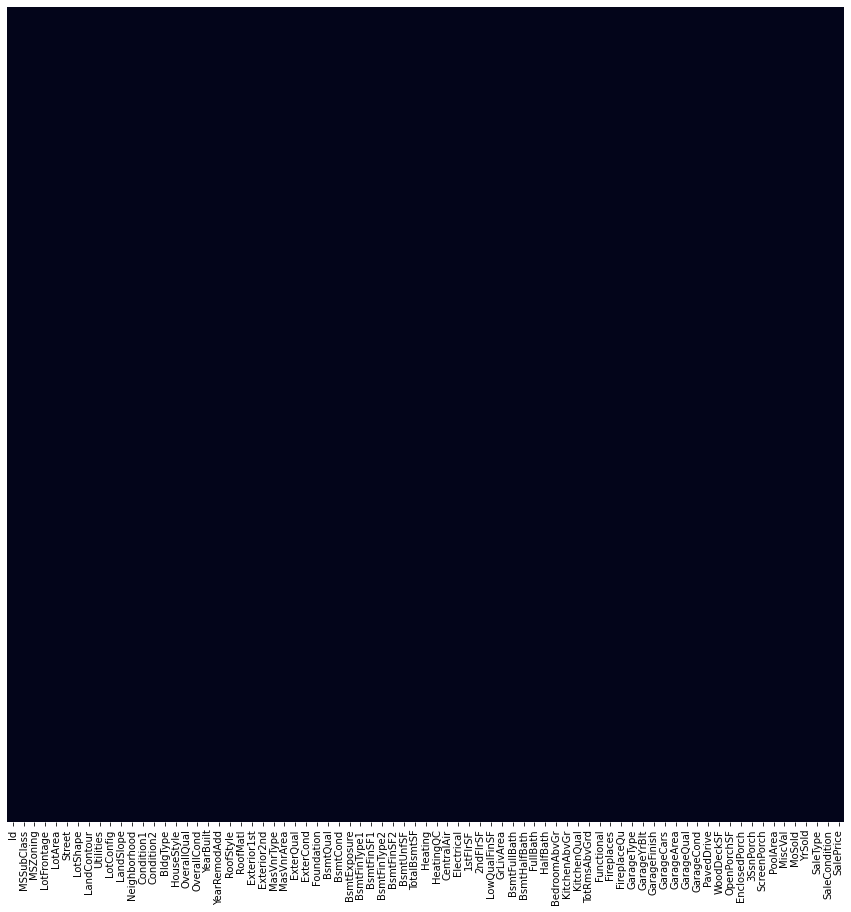

In [64]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(Init_data.isnull(),yticklabels=False,cbar=False)

In [6]:
Init_data["MasVnrType"].isnull().sum()

8

In [7]:
(Init_data.Fireplaces==0).sum()

690

In [8]:
Init_data["FireplaceQu"].isnull().sum()


690

# Observation 1
## all the places with no fireplaces were counted as Null value in the coloumn of FirePlace Quality there for i will be replacing thos Null Values With NF (no firePlace)
### this goes for multiple coloumns

In [9]:
Init_data.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [10]:
Init_data["FireplaceQu"].fillna("NF",axis=0,inplace=True)

In [11]:
Init_data["LotFrontage"].fillna(Init_data["LotFrontage"].mean(),axis=0,inplace=True)

In [12]:
Init_data["GarageType"].fillna("NG",axis=0,inplace=True)
Init_data["GarageQual"].fillna("NG",axis=0,inplace=True)
Init_data["GarageCond"].fillna("NG",axis=0,inplace=True)
Init_data["GarageYrBlt"].fillna(0000,axis=0,inplace=True)
Init_data["GarageFinish"].fillna("NG",axis=0,inplace=True)

In [13]:
Init_data["Electrical"].fillna("SBrkr",axis=0,inplace=True)

In [14]:
Init_data["MasVnrType"].fillna("NMVA",axis=0,inplace=True)
Init_data["MasVnrArea"].fillna(Init_data["MasVnrArea"].mean(),axis=0,inplace=True)


In [15]:
Init_data["BsmtQual"].fillna("NB",axis=0,inplace=True)
Init_data["BsmtCond"].fillna("NB",axis=0,inplace=True)
Init_data["BsmtExposure"].fillna("NB",axis=0,inplace=True)
Init_data["BsmtFinType1"].fillna("NB",axis=0,inplace=True)
Init_data["BsmtFinType2"].fillna("NB",axis=0,inplace=True)



# Now The Data is Prepocessed 

In [16]:
features=Init_data.select_dtypes(include=['object']).copy()
Categorical_features= features.columns

In [17]:
Categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
enc=LabelEncoder()
def encoding (data,x):
    data[x]=enc.fit_transform(data[x])

In [28]:
for i in range(len(Categorical_features)):
    encoding(Init_data,Categorical_features[i])

In [58]:
Features_data=Init_data.drop(["SalePrice"],axis=1)
Target=Init_data["SalePrice"]
x_train, x_test, y_train, y_test= train_test_split(Features_data, Target, test_size=0.2)

In [67]:
clf=RandomForestClassifier(n_estimators=1000)
clf.fit(x_train, y_train) 
predicted=clf.predict(x_test)
mse=mean_squared_error(y_test,predicted)
print("RMSE", np.sqrt(mse))                                 

RMSE 39686.379632120574


In [33]:
predicted

array([108000, 140000, 100000, 210000, 169000, 115000, 115000, 119000,
       141000, 192500, 187100, 129000,  67000, 143000, 120500, 127000,
       102000, 143000, 204000, 501837, 320000, 128500, 135000, 250000,
       164990, 135000, 148000, 148500, 155000, 186700,  84500, 143000,
       173000, 283463, 172500, 100000, 138000, 141500, 185850, 125000,
       380000, 120000, 173900, 144000, 191000, 135000, 187750, 130000,
       144000, 216837, 137000, 184000, 123000, 108000, 180000, 192000,
       140000, 110000, 145500, 150000, 140000, 200000, 159500, 140000,
       158000, 160000, 251000, 145000, 182000, 127000, 192000, 165000,
       175900, 135000, 172500, 123600, 113000, 129000, 250000, 110000,
       175000, 110000, 163990, 179200, 109008, 178000, 127000, 142953,
       120500, 202500, 226700,  60000, 197000, 250000, 181000,  79000,
       118858, 155000, 149000, 158000, 241500, 239686, 125000, 275000,
       106500, 100000, 201000, 315000, 100000, 140000, 153500, 124000,
      

In [34]:
Test_data = pd.read_csv(r"C:\Users\Skander\Desktop\Kaggle\Test For House Prices.csv")

<AxesSubplot:>

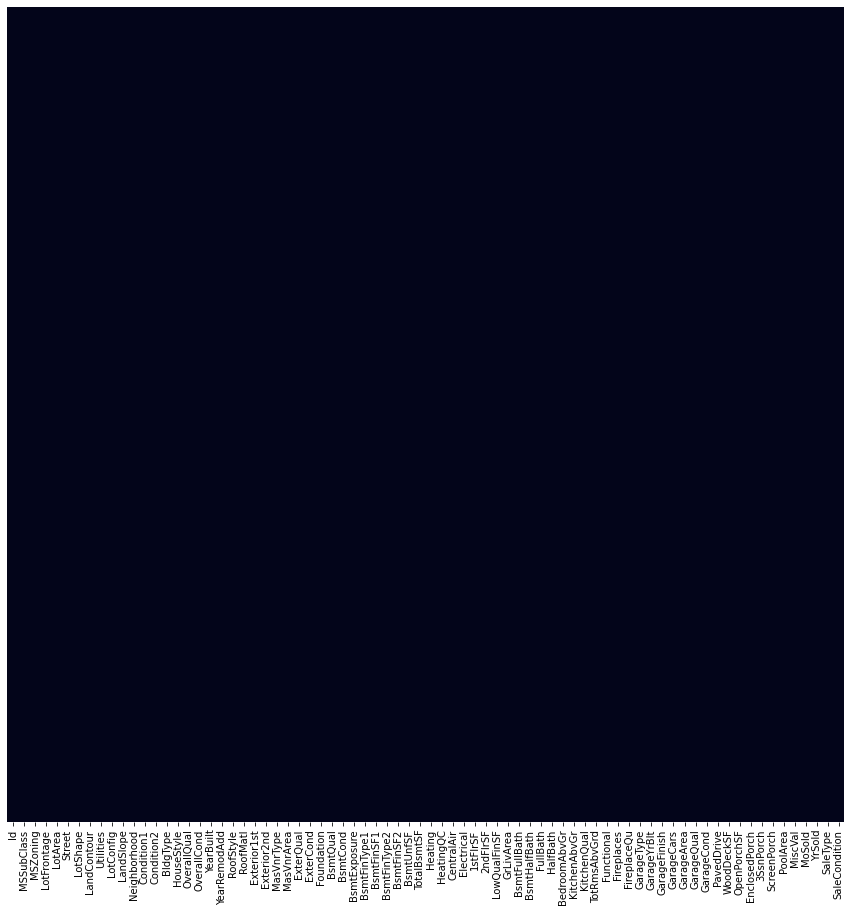

In [63]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(Test_data.isnull(),yticklabels=False,cbar=False)

In [38]:
Test_data.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [39]:
Test_data["FireplaceQu"].fillna("NF",axis=0,inplace=True)

In [40]:
Test_data["LotFrontage"].fillna(Init_data["LotFrontage"].mean(),axis=0,inplace=True)

In [41]:
Test_data["GarageType"].fillna("NG",axis=0,inplace=True)
Test_data["GarageQual"].fillna("NG",axis=0,inplace=True)
Test_data["GarageCond"].fillna("NG",axis=0,inplace=True)
Test_data["GarageYrBlt"].fillna(0000,axis=0,inplace=True)
Test_data["GarageFinish"].fillna("NG",axis=0,inplace=True)

In [42]:
Test_data["Electrical"].fillna("SBrkr",axis=0,inplace=True)

In [43]:
Test_data["MasVnrType"].fillna("NMVA",axis=0,inplace=True)
Test_data["MasVnrArea"].fillna(Init_data["MasVnrArea"].mean(),axis=0,inplace=True)


In [44]:
Test_data["BsmtQual"].fillna("NB",axis=0,inplace=True)
Test_data["BsmtCond"].fillna("NB",axis=0,inplace=True)
Test_data["BsmtExposure"].fillna("NB",axis=0,inplace=True)
Test_data["BsmtFinType1"].fillna("NB",axis=0,inplace=True)
Test_data["BsmtFinType2"].fillna("NB",axis=0,inplace=True)
Test_data["MSZoning"].fillna("A",axis=0,inplace=True)
Test_data["TotalBsmtSF"].fillna(Test_data["TotalBsmtSF"].mean(),axis=0,inplace=True)
Test_data["Utilities"].fillna("AllPub",axis=0,inplace=True)

Test_data["Exterior1st"].fillna("BrkFace",axis=0,inplace=True)
Test_data["Exterior2nd"].fillna("CBlock",axis=0,inplace=True)
Test_data["BsmtFinSF2"].fillna(Test_data["BsmtFinSF2"].mean(),axis=0,inplace=True)
Test_data["BsmtFinSF1"].fillna(Test_data["BsmtFinSF1"].mean(),axis=0,inplace=True)
Test_data["BsmtUnfSF"].fillna(Test_data["BsmtUnfSF"].mean(),axis=0,inplace=True)
Test_data["BsmtFullBath"].fillna(Test_data["BsmtFullBath"].mean(),axis=0,inplace=True)
Test_data["BsmtHalfBath"].fillna(Test_data["BsmtHalfBath"].mean(),axis=0,inplace=True)

Test_data["KitchenQual"].fillna("TA",axis=0,inplace=True)
Test_data["Functional"].fillna("Typ",axis=0,inplace=True)
Test_data["GarageCars"].fillna(Test_data["GarageCars"].mean(),axis=0,inplace=True)
Test_data["GarageArea"].fillna(Test_data["GarageArea"].mean(),axis=0,inplace=True)
Test_data["SaleType"].fillna("New",axis=0,inplace=True)


In [45]:
features=Test_data.select_dtypes(include=['object']).copy()
Categorical_features= features.columns
Categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [46]:
for i in range(len(Categorical_features)):
    encoding(Test_data,Categorical_features[i])

In [60]:
predicted=clf.predict(Test_data)

In [62]:
pred.head(20)

,0
0,72500
1,151500
2,175000
3,175000
4,185000
5,178000
6,185000
7,175000
8,210000
9,120500


In [48]:
pred=pd.DataFrame(predicted)
sub_df=pd.read_csv(r"C:\Users\Skander\Desktop\Kaggle\sample_submission.csv")
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)